
kNN from scratch

In [1]:
# Library imports
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from scipy import stats

In [3]:
# 1. Load the data
x_train, x_test = np.load('train-data-012.npy'), np.load('test-data-012.npy')
y_train, y_test = np.load('train-labels-012.npy'), np.load('test-labels-012.npy')

Training data is comprised of 18623 objects and 2 features
Testing data is comprised of 3147 objects and 2 features


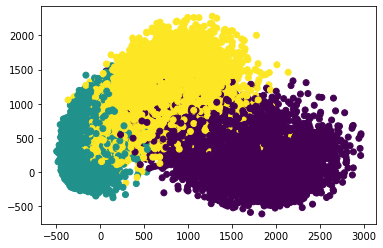

In [4]:
# 2. Explore (very quickly) the feature space

# Understand how many instances (rows) and features (columns) I have
nobj, nfeat = x_train.shape[0], x_train.shape[1]
print(f"Training data is comprised of {nobj} objects and {nfeat} features")
print(f"Testing data is comprised of {x_test.shape[0]} objects and {x_test.shape[1]} features")

# Visualize using a scatterplot
plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.show()

In [10]:
# 3. Parameter initialization (you can play around with these)
K = 7
DIST_TYPE = 'euclidean'

# 4. Calculate the distance matrix between all train objects and test objects
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
# P.S: This operation can be very time consuming for large matrices
D = cdist(x_train, x_test, metric=DIST_TYPE) # TrainxTest

# 5. For each testing instance, order the distances from smallest to the largest and find the train indices of the K closest ones:
# - Argsort
# - Keep the first K
neighbors = np.argsort(D, axis=0) #TrainxTest
k_neighbors = neighbors[:K, :] # KxTest

# 6. Check the labels of these K points and assign the most frequent one as the class:
# - Get the labels of the neighbouring points
# - Find the most frequent label -> the mode
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html
neighbors_labels = y_train[k_neighbors]
prediction = stats.mode(neighbors_labels, axis=0)[0].flatten()

# 7. Calculate accuracy
accuracy = np.sum(prediction == y_test) / len(y_test)
print("Accuracy: " + "{0:.2f}".format(accuracy*100) + "%")

Accuracy: 94.28%
